## 1.1 EDA
Använd pandas, matplotlib och seaborn för att besvara nedan frågor för datasetet.
Sammanfatta dina resultat och presentera dem i en notebook. Använd markdown boxar för löpande text.


In [1]:
import pandas as pd
df = pd.read_csv("../Lab/data/cardio_train.csv",sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [3]:
# Data cleaning

# Removing unreasonable values below 0 and above 300 for Systolic and Diastolic blood pressure.
df.drop(df[df["ap_hi"] < 0].index, inplace=True)
df.drop(df[df["ap_hi"] > 300].index, inplace=True)
df.drop(df[df["ap_lo"] < 0].index, inplace=True)
df.drop(df[df["ap_lo"] > 300].index, inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,68999.0,49968.513355,28847.212352,0.0,24996.5,50007.0,74861.5,99999.0
age,68999.0,19463.790664,2468.264092,10798.0,17656.5,19700.0,21323.0,23713.0
gender,68999.0,1.348715,0.476567,1.0,1.0,1.0,2.0,2.0
height,68999.0,164.359759,8.204275,55.0,159.0,165.0,170.0,250.0
weight,68999.0,74.118574,14.328439,11.0,65.0,72.0,82.0,200.0
ap_hi,68999.0,126.322497,17.708323,7.0,120.0,120.0,140.0,240.0
ap_lo,68999.0,81.333976,9.872897,0.0,80.0,80.0,90.0,190.0
cholesterol,68999.0,1.364382,0.678699,1.0,1.0,1.0,1.0,3.0
gluc,68999.0,1.225858,0.571812,1.0,1.0,1.0,1.0,3.0
smoke,68999.0,0.087871,0.283109,0.0,0.0,0.0,0.0,1.0


a) Hur många är positiva för hjärt-kärlsjukdomoch hur många är negativa?


In [4]:
negative_cardio = df["cardio"].value_counts()[0]
positive_cardio = df["cardio"].value_counts()[1]

negative_cardio, positive_cardio

(34853, 34146)

b) Hur stor andel har normala, över normala och långt över normala kolesterolvärden?


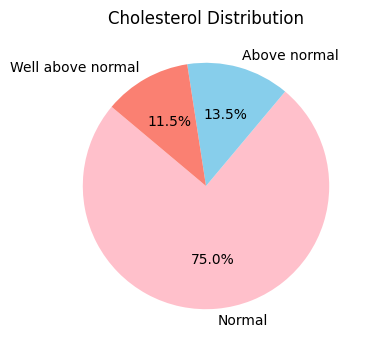

In [5]:
#1: normal, 2: above normal, 3: well above normal
import matplotlib.pyplot as plt

# Calculate the counts of smoking and non-smoking individuals
colesterol_counts = df["cholesterol"].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(colesterol_counts, 
        labels=['Normal', 'Above normal', 'Well above normal'], 
        autopct='%1.1f%%', 
        colors=['pink','skyblue', 'salmon'], 
        startangle=140)
plt.title('Cholesterol Distribution')
plt.show()

c) Hur ser åldersfördelningen ut?


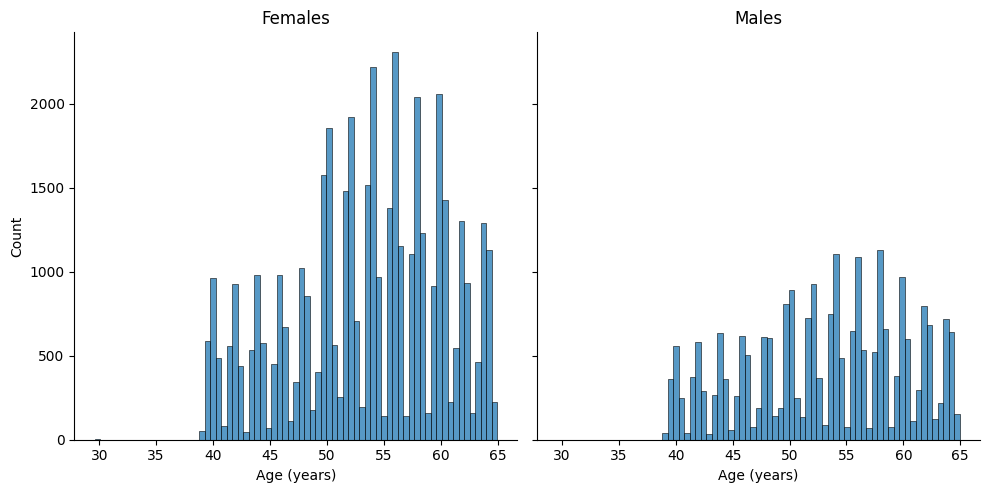

In [6]:
import seaborn as sns
fig = sns.displot(data=df, x=df["age"]/365, col="gender", hue_order=["Female", "Male"])
fig.set_axis_labels("Age (years)", "Count")
titles = ["Females", "Males"]
for ax, title in zip(fig.axes.flat, titles):
    ax.set_title(title);


d) Hur stor andel röker?


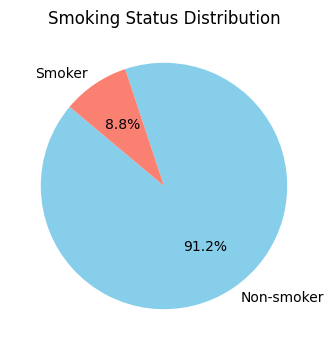

In [7]:
import matplotlib.pyplot as plt

# Calculate the counts of smoking and non-smoking individuals
smoke_counts = df['smoke'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(smoke_counts, 
        labels=['Non-smoker', 'Smoker'], 
        autopct='%1.1f%%', 
        colors=['skyblue', 'salmon'], 
        startangle=140)
plt.title('Smoking Status Distribution')
plt.show()


e) Hur ser viktfördelningen ut?
f) Hur ser längdfördelningen ut?


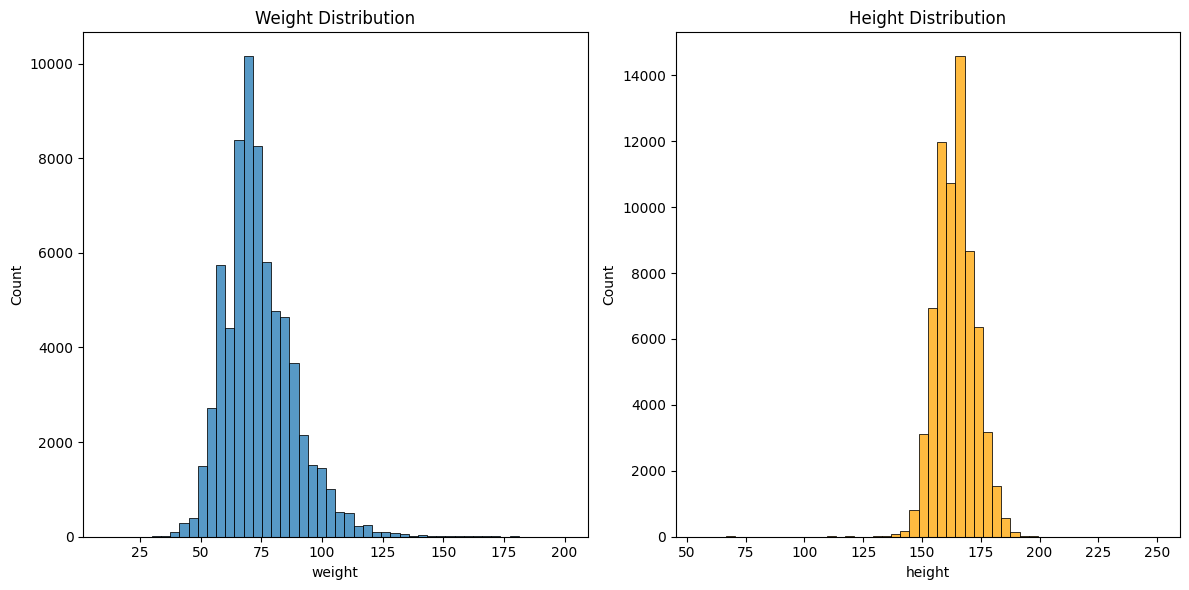

In [8]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histogram of weight on the first subplot
sns.histplot(data=df, x="weight", bins=50, ax=axs[0])
axs[0].set_title('Weight Distribution')

# Plot the histogram of height on the second subplot
sns.histplot(data=df, x="height", bins=50, ax=axs[1], color='orange')
axs[1].set_title('Height Distribution')

# Show the plot
plt.tight_layout()
plt.show()


g) Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom?

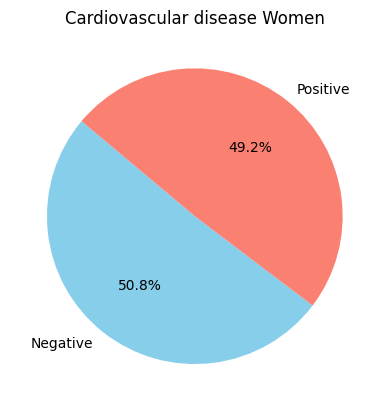

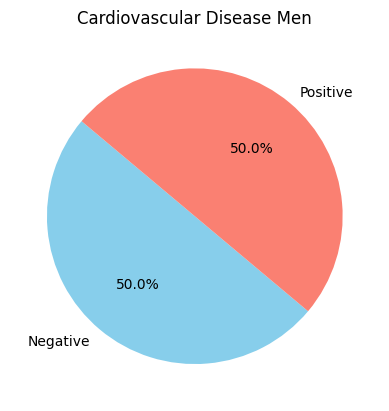

In [9]:
import matplotlib.pyplot as plt

# Filter the DataFrame for women and men
women = df[df['gender'] == 1] # Female
men = df[df['gender'] == 2] # Male
 
women_cardio_count = women["cardio"].value_counts()
men_cardio_count = men["cardio"].value_counts()

plt.pie(women_cardio_count, 
        labels=['Negative', 'Positive'], 
        autopct='%1.1f%%', 
        colors=['skyblue', 'salmon'], 
        startangle=140)
plt.title('Cardiovascular disease Women')
plt.show()
plt.pie(men_cardio_count, 
        labels=['Negative', 'Positive'], 
        autopct='%1.1f%%', 
        colors=['skyblue', 'salmon'], 
        startangle=140)
plt.title('Cardiovascular Disease Men')
plt.show()


## 1.2 Modelldesign
### Skapa en heatmap av korrelationer i datan.
Se om du hittar features som är starkt korrelerade, dvs betydligt skiljt från 0
med positiv tal eller features som är starkt negativt korrelerade. Detta är en
ledning för kommande uppgifter och är en del av att designa modellen, men skall
presenteras som del av data-analysen. Lägg till heatmap och resonera kring vad
den visar tillsammans med den tidigare data-analysen du gjort.

<Axes: >

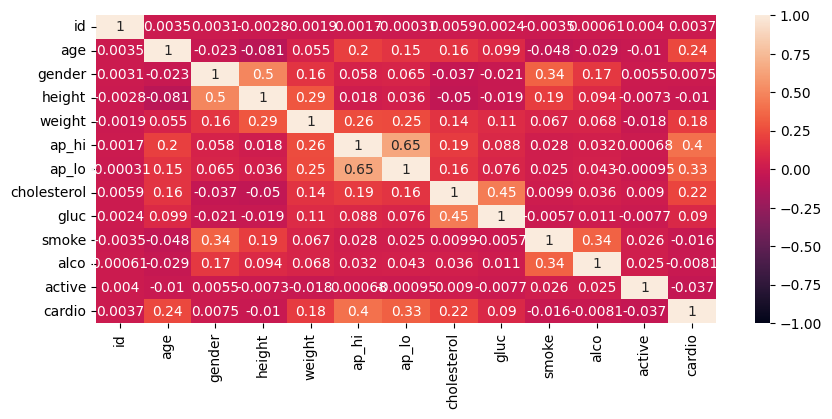

In [10]:
#check corelation
fig = plt.figure(figsize=(10, 4))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=+1)

## 1.2.1 Feature Engineering
I detta avsnitt skall du dokumentera vad du gjorde i löpandet text. Ta inte med
misstag eller sidospår, utan bara vad som faktiskt ledde till det senare resultatet.
Skapa en feature f¨or BMI (Body Mass Index), läs på om formeln på wikipedia.


a) Släng de samples med orimliga BMIer och outliers. Notera att detta kan
vara svårt att avgöra i vilket range av BMIer som vi ska spara. Beskriv
hur du kommer fram till gränserna, med resonemang eller referens.


Här går det att läsa om BMI och olika rimliga värden på [BMI](https://www.aleris.se/overvikt/rakna-ut-ditt-bmi/). Eftersom kraftig undervikt för en kvinna är [under BMI 16](https://www.folkhalsomyndigheten.se/contentassets/c536d143d614486abf93b1261d2ec1b6/utveckling-bmi-sverige-1980-2022.pdf) har den nedre gränsen dragits vid 14 och den övre gränsen vid 50 då fetma grad 3 kan sägas vara över 40 [FHM](https://www.folkhalsomyndigheten.se/nyheter-och-press/nyhetsarkiv/2023/mars/fortsatt-okning-av-fetma-och-overvikt/), och det är fler som kan leva med en ett högt BMI än ett allt för lågt.

In [11]:
df["BMI"] = round(df["weight"] / ((df["height"]/100)**2), 2)
df["BMI"].describe()


count    68999.000000
mean        27.524595
std          6.080617
min          3.470000
25%         23.880000
50%         26.350000
75%         30.120000
max        298.670000
Name: BMI, dtype: float64

In [12]:
df.drop(df[df["BMI"] < 12].index, inplace=True)
df.drop(df[df["BMI"] > 60].index, inplace=True)
df["BMI"].describe()

count    68929.000000
mean        27.448591
std          5.210343
min         12.250000
25%         23.880000
50%         26.350000
75%         30.120000
max         60.000000
Name: BMI, dtype: float64

### BMI Category
c) Undersök om kategorin är relevant, dvs dess korrelationer. Uppdatera
data-analysen om du hittar något intressant.

b) Skapa en kategorisk BMI-feature med kategorierna: normal range, overweight, obese (class I), obese (class II), obese (class III).

In [13]:
import numpy as np
# Define the conditions and categories for BMI classification
conditions = [
    (df['BMI'] < 25),
    (df['BMI'] >= 25) & (df['BMI'] < 30),
    (df['BMI'] >= 30) & (df['BMI'] < 35),
    (df['BMI'] >= 35) & (df['BMI'] < 40),
    (df['BMI'] >= 40)
]

categories = ['Normal range', 'Overweight', 'Obese (Class I)', 'Obese (Class II)', 'Obese (Class III)']

# Create a new feature 'BMI_category' based on the conditions
df['BMI_category'] = np.select(conditions, categories, default='Unknown')
# Convert 'BMI_category' to categorical feature
df['BMI_category'] = df['BMI_category'].astype('category')

df["BMI_category"].value_counts()



BMI_category
Normal range         26052
Overweight           24832
Obese (Class I)      12022
Obese (Class II)      4262
Obese (Class III)     1761
Name: count, dtype: int64

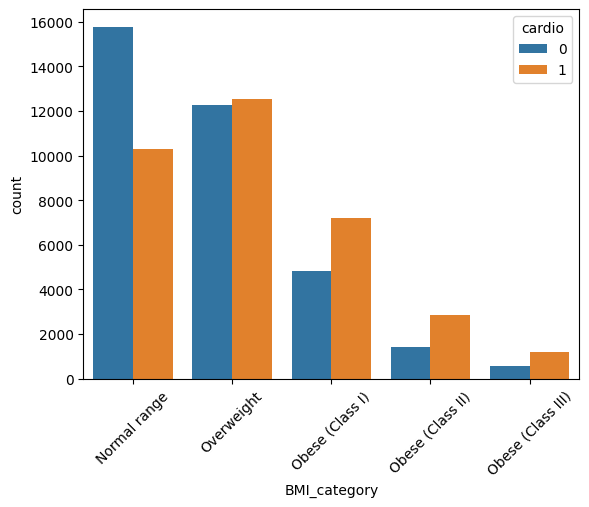

C:\Users\glajusj\AppData\Local\Temp\ipykernel_880\1085183222.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('BMI_category')


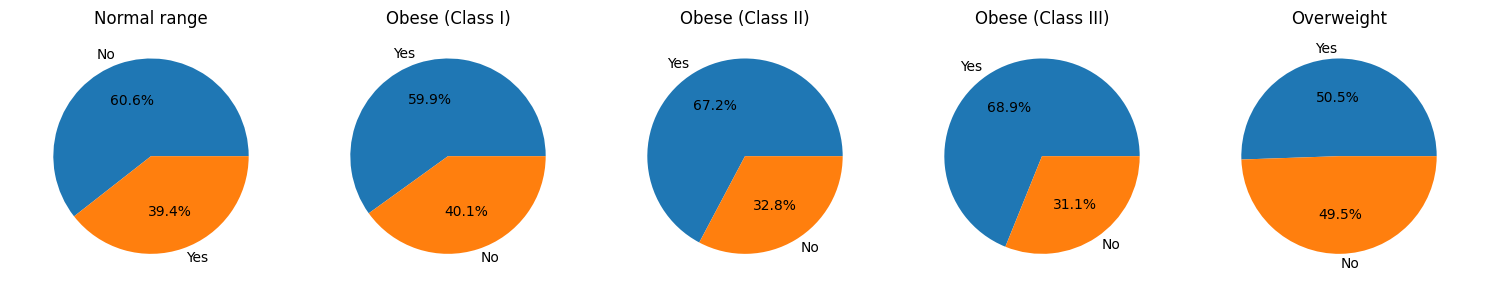

In [14]:
sns.countplot(x=df["BMI_category"], 
              hue=df["cardio"], 
              order=['Normal range', 'Overweight', 'Obese (Class I)', 'Obese (Class II)', 'Obese (Class III)'],
            )
# Rotate x-axis labels at a 45-degree angle
plt.xticks(rotation=45)

# Show the plot
plt.show();

import matplotlib.pyplot as plt

# Create a single figure with 5 subplots arranged in a 1x5 grid
fig, axs = plt.subplots(1, 5, figsize=(15, 3))

# Group the DataFrame by 'BMI_category'
grouped = df.groupby('BMI_category')

# Iterate through each BMI category and create a pie plot
for i, (category, data) in enumerate(grouped):
    # Count the occurrences of cardio values (0|1)
    cardio_counts = data['cardio'].value_counts()
    
    # Calculate the percentages
    percentages = cardio_counts / cardio_counts.sum() * 100
    
    # Create a pie plot in the i-th subplot
    axs[i].pie(percentages, labels=cardio_counts.index.map({0: 'No', 1: 'Yes'}), autopct='%1.1f%%')
    axs[i].set_title(f'{category}')
    axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [15]:
no_cardio_nr = len(df.query("cardio == 0 & BMI_category == 'Normal range'"))
cardio_nr = len(df.query("cardio == 1 & BMI_category == 'Normal range'"))

no_cardio_o = len(df.query("cardio == 0 & BMI_category == 'Overweight'"))
cardio_o = len(df.query("cardio == 1 & BMI_category == 'Overweight'"))

no_cardio_1 = len(df.query("cardio == 0 & BMI_category == 'Obese (Class I)'"))
cardio_1 = len(df.query("cardio == 1 & BMI_category == 'Obese (Class I)'"))

no_cardio_2 = len(df.query("cardio == 0 & BMI_category == 'Obese (Class II)'"))
cardio_2 = len(df.query("cardio == 1 & BMI_category == 'Obese (Class II)'"))

no_cardio_3 = len(df.query("cardio == 0 & BMI_category == 'Obese (Class III)'"))
cardio_3 = len(df.query("cardio == 1 & BMI_category == 'Obese (Class III)'"))

print("Normal range ")
print(no_cardio_nr/len(df.query("BMI_category == 'Normal range'"))*100)
print(cardio_nr/len(df.query("BMI_category == 'Normal range'"))*100)
print("\nOverweight")
print(no_cardio_o/len(df.query("BMI_category == 'Overweight'"))*100)
print(cardio_o/len(df.query("BMI_category == 'Overweight'"))*100)
print("\nObese (Class I)")
print(no_cardio_1/len(df.query("BMI_category == 'Obese (Class I)'"))*100)
print(cardio_1/len(df.query("BMI_category == 'Obese (Class I)'"))*100)
print('\nObese (Class II)')
print(no_cardio_2/len(df.query("BMI_category == 'Obese (Class II)'"))*100)
print(cardio_2/len(df.query("BMI_category == 'Obese (Class II)'"))*100)
print('\nObese (Class III)')
print(no_cardio_3/len(df.query("BMI_category == 'Obese (Class III)'"))*100)
print(cardio_3/len(df.query("BMI_category == 'Obese (Class III)'"))*100)




Normal range 
60.56348840779978
39.43651159220021

Overweight
49.45231958762887
50.54768041237113

Obese (Class I)
40.05989020129762
59.94010979870238

Obese (Class II)
32.7545753167527
67.24542468324731

Obese (Class III)
31.118682566723454
68.88131743327655


### Blood Pressure Category

In [16]:
import numpy as np

# Define the conditions and categories for blood pressure classification
conditions = [
    (df['ap_hi'] < 120) & (df['ap_lo'] < 80),
    (df['ap_hi'].between(120, 129)) & (df['ap_lo'] < 80),
    (df['ap_hi'].between(130, 139)) | (df['ap_lo'].between(80, 89)),
    (df['ap_hi'] >= 140) | (df['ap_lo'] >= 90),
    (df['ap_hi'] > 180) | (df['ap_lo'] > 120)
]

categories = ['Healthy', 'Elevated', 'Stage 1 Hypertension', 'Stage 2 Hypertension', 'Hypertensive Crisis']

# Create a new column 'bloodpressure' based on the conditions
df['bloodpressure'] = np.select(conditions, categories, default='Unknown')
# Convert 'BMI_category' to categorical feature
df['bloodpressure'] = df['bloodpressure'].astype('category')

df["bloodpressure"].value_counts()


bloodpressure
Stage 1 Hypertension    39834
Stage 2 Hypertension    16376
Healthy                  9598
Elevated                 3121
Name: count, dtype: int64

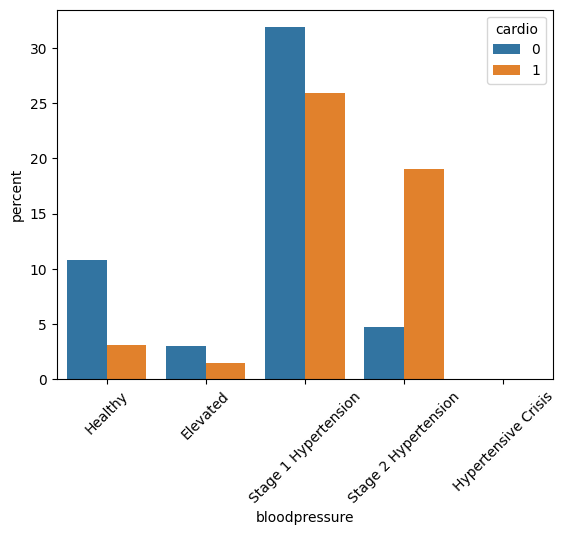

In [17]:
sns.countplot(x=df["bloodpressure"], hue=df["cardio"], stat='percent', dodge=True, order=['Healthy', 'Elevated', 'Stage 1 Hypertension', 'Stage 2 Hypertension', 'Hypertensive Crisis'])
# Rotate x-axis labels at a 45-degree angle
plt.xticks(rotation=45)

# Show the plot
plt.show();

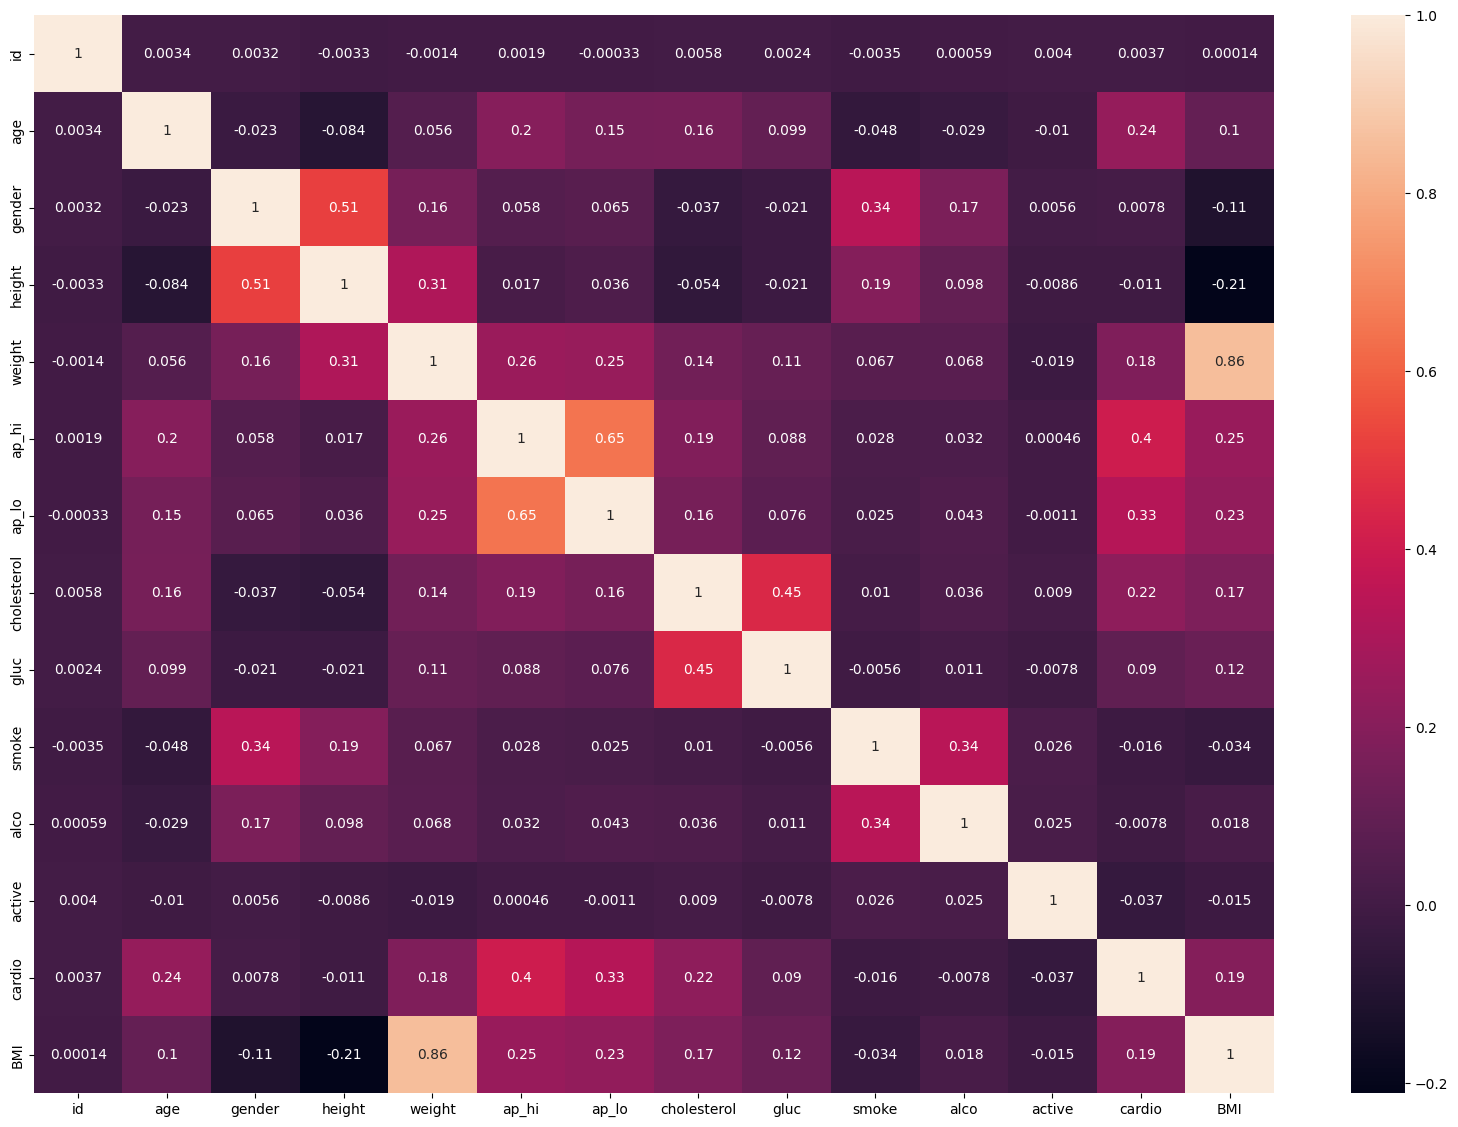

In [18]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [19]:
# Assume df is your original DataFrame

# Create a copy of the original DataFrame
df_copy1 = df.copy()
df_copy2 = df.copy()

# Remove specified features from the first DataFrame
features_to_remove_1 = ['ap_hi', 'ap_lo', 'height', 'weight', 'BMI']
df_copy1.drop(features_to_remove_1, axis=1, inplace=True)

# One-hot encode BMI category, blood pressure category, and gender
df_copy1 = pd.get_dummies(df_copy1, columns=['BMI_category', 'bloodpressure', 'gender'])

# Remove specified features from the second DataFrame
features_to_remove_2 = ['BMI_category', 'bloodpressure', 'height', 'weight']
df_copy2.drop(features_to_remove_2, axis=1, inplace=True)

# One-hot encode gender
df_copy2 = pd.get_dummies(df_copy2, columns=['gender'])

# Display the modified DataFrames
print("DataFrame 1:")
print(df_copy1.head())

print("\nDataFrame 2:")
print(df_copy2.head())

DataFrame 1:
   id    age  cholesterol  gluc  smoke  alco  active  cardio  \
0   0  18393            1     1      0     0       1       0   
1   1  20228            3     1      0     0       1       1   
2   2  18857            3     1      0     0       0       1   
3   3  17623            1     1      0     0       1       1   
4   4  17474            1     1      0     0       0       0   

   BMI_category_Normal range  BMI_category_Obese (Class I)  \
0                       True                         False   
1                      False                          True   
2                       True                         False   
3                      False                         False   
4                       True                         False   

   BMI_category_Obese (Class II)  BMI_category_Obese (Class III)  \
0                          False                           False   
1                          False                           False   
2                        

In [21]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
# Import other necessary algorithms

# Define algorithms
algorithms = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC()
    # Add other algorithms here
}

# Define parameter grids for each algorithm
param_grids = {
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.05, 0.01]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
    # Define parameter grids for other algorithms
}

# df_copy1 and df_copy2 are modified DataFrames
datasets = {'Dataset 1': df_copy1, 'Dataset 2': df_copy2}

# Iterate over each dataset
for dataset_name, dataset in datasets.items():
    print(f"\nWorking on {dataset_name}:")
    
    X = dataset.drop(['cardio'], axis=1)  # Features
    y = dataset['cardio']  # Target variable
    
    # Iterate over each algorithm
    results = {}
    for algo_name, algo in algorithms.items():
        print(f"\nPerforming {algo_name}...")
        param_grid = param_grids[algo_name]

        # Scale and split data
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

        # Perform GridSearchCV
        grid_search = GridSearchCV(algo, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Evaluate the model
        y_pred = grid_search.predict(X_test)
        if isinstance(algo, RandomForestClassifier) or isinstance(algo, GradientBoostingClassifier):
            report = classification_report(y_test, y_pred)
            print(f"Classification report for {algo_name}:")
            print(report)
        else:  # Regression
            mse = mean_squared_error(y_test, y_pred)
            print(f"Mean Squared Error for {algo_name}: {mse}")

        # Collect outcome data
        results[algo_name] = {
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_,
            'evaluation_result': report if isinstance(algo, RandomForestClassifier) or isinstance(algo, GradientBoostingClassifier) else mse
        }

    # Print out results for each algorithm
    for algo_name, result in results.items():
        print(f"\nResults for {algo_name}:")
        print(f"Best Parameters: {result['best_params']}")
        print(f"Best Score: {result['best_score']}")
        print(f"Evaluation Result: {result['evaluation_result']}")




Working on Dataset 1:

Performing Random Forest...
Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.68      0.77      0.73      6933
           1       0.74      0.64      0.68      6853

    accuracy                           0.71     13786
   macro avg       0.71      0.71      0.71     13786
weighted avg       0.71      0.71      0.71     13786


Performing Gradient Boosting...
Classification report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      6933
           1       0.73      0.65      0.69      6853

    accuracy                           0.71     13786
   macro avg       0.71      0.71      0.70     13786
weighted avg       0.71      0.71      0.70     13786


Performing Support Vector Machine...


In [ ]:
import os
from sklearn.externals import joblib

# Print the current working directory
print("Current working directory:", os.getcwd())